In [1161]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns
import datetime

# Set data files
americans_sleep_data_file = "/Users/jennabarkley/Desktop/resources/2003-2017_time americans_spend_sleeping.csv"
employee_attrition_data_file = "/Users/jennabarkley/Desktop/resources/employee_attrition.csv"
sleep_efficiency_data_file = "/Users/jennabarkley/Desktop/resources/2021 sleep_efficiency.csv"
male_sleep_data_file = "/Users/jennabarkley/Desktop/resources/20191001-20200731_male_sleep.csv"
female_sleep_data_file = "/Users/jennabarkley/Desktop/resources/20191015-20200729_jb_fitbit_sleep.csv"
wellbeing_data_file = "/Users/jennabarkley/Desktop/resources/wellbeing_lifestyle.csv"


# Read data files
americans_sleep = pd.read_csv(americans_sleep_data_file)
employee_attrition = pd.read_csv(employee_attrition_data_file)
sleep_efficiency = pd.read_csv(sleep_efficiency_data_file)
male_sleep = pd.read_csv(male_sleep_data_file)
female_sleep = pd.read_csv(female_sleep_data_file)
wellbeing = pd.read_csv(wellbeing_data_file)


In [1162]:
# look at sleep_efficiency values
sleep_efficiency.head()


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [1163]:
# check for null values
sleep_efficiency.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [1164]:
# drop columns with null values that aren't useful
sleep_efficiency.drop(columns=["ID","Caffeine consumption","Alcohol consumption","Smoking status","Exercise frequency"],inplace=True)
sleep_efficiency.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0


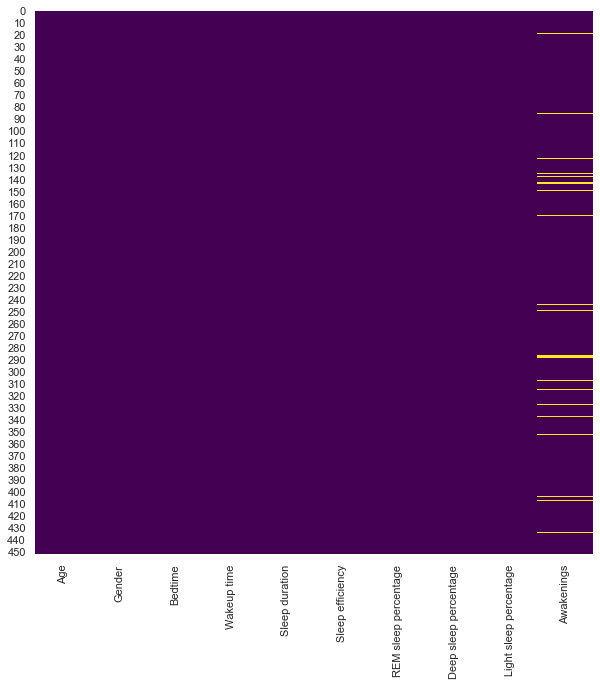

In [1165]:
# check to see the amount of data that is missing to make decisions whether to drop these missing values or to replace them
sns.heatmap(sleep_efficiency.isnull(),cbar=False,cmap='viridis')

In [1166]:
# replace missing values with mean
num_col = ['Awakenings']
for col in num_col:
    sleep_efficiency[col]=pd.to_numeric(sleep_efficiency[col])
    sleep_efficiency[col].fillna(sleep_efficiency[col].mean(), inplace=True)
sleep_efficiency.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0


In [1167]:
# check if any null values remain
sleep_efficiency.isnull().sum()

Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
dtype: int64

In [1168]:
# split date and time in the Bedtime column
se_st = sleep_efficiency["Bedtime"]
se_split = se_st.str.split(expand=True)
se_split.columns = ['startDate', 'startTime']
se_split.head()

,startDate,startTime
0,2021-03-06,01:00:00
1,2021-12-05,02:00:00
2,2021-05-25,21:30:00
3,2021-11-03,02:30:00
4,2021-03-13,01:00:00


In [1169]:
# split date and time in the Wakeup time column
se_et = sleep_efficiency["Wakeup time"]
wt_split = se_et.str.split(expand=True)
wt_split.columns = ['endDate', 'endTime']
wt_split.head()

,endDate,endTime
0,2021-03-06,07:00:00
1,2021-12-05,09:00:00
2,2021-05-25,05:30:00
3,2021-11-03,08:30:00
4,2021-03-13,09:00:00


In [1170]:
# create a new dataframe for split columns
se_split_df = pd.DataFrame().assign(startDate=se_split['startDate'],startTime=se_split['startTime'],endDate=wt_split['endDate'],\
                                 endTime=wt_split['endTime'],)
se_split_df.head()

,startDate,startTime,endDate,endTime
0,2021-03-06,01:00:00,2021-03-06,07:00:00
1,2021-12-05,02:00:00,2021-12-05,09:00:00
2,2021-05-25,21:30:00,2021-05-25,05:30:00
3,2021-11-03,02:30:00,2021-11-03,08:30:00
4,2021-03-13,01:00:00,2021-03-13,09:00:00


In [1171]:
# drop old start/end time columns
sleep_efficiency.drop(columns=["Bedtime","Wakeup time"],inplace=True)
sleep_efficiency.head()

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings
0,65,Female,6.0,0.88,18,70,12,0.0
1,69,Male,7.0,0.66,19,28,53,3.0
2,40,Female,8.0,0.89,20,70,10,1.0
3,40,Female,6.0,0.51,23,25,52,3.0
4,57,Male,8.0,0.76,27,55,18,3.0


In [1172]:
# create new dataframe with new split columns
sleep_efficiency_new = pd.DataFrame().assign(Age=sleep_efficiency['Age'], Gender=sleep_efficiency['Gender'],\
                                        SleepDuration=sleep_efficiency['Sleep efficiency'], REMSleepPerc=sleep_efficiency['REM sleep percentage'],\
                                        DeepSleepPerc=sleep_efficiency['Deep sleep percentage'],LightSleepPerc=sleep_efficiency['Light sleep percentage'],\
                                        Awakenings=sleep_efficiency['Awakenings'], StartDate=se_split['startDate'],StartTime=se_split['startTime'],\
                                        EndDate=wt_split['endDate'],EndTime=wt_split['endTime']
                                        )
sleep_efficiency_new.head()

,Age,Gender,SleepDuration,REMSleepPerc,DeepSleepPerc,LightSleepPerc,Awakenings,StartDate,StartTime,EndDate,EndTime
0,65,Female,0.88,18,70,12,0.0,2021-03-06,01:00:00,2021-03-06,07:00:00
1,69,Male,0.66,19,28,53,3.0,2021-12-05,02:00:00,2021-12-05,09:00:00
2,40,Female,0.89,20,70,10,1.0,2021-05-25,21:30:00,2021-05-25,05:30:00
3,40,Female,0.51,23,25,52,3.0,2021-11-03,02:30:00,2021-11-03,08:30:00
4,57,Male,0.76,27,55,18,3.0,2021-03-13,01:00:00,2021-03-13,09:00:00


In [1173]:
# look at employee_attrition values
employee_attrition.head()

,Age,Gender,PerformanceRating,Attrition,JobSatisfaction,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Female,3,Yes,4,Travel_Rarely,1102,Sales,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Male,4,No,2,Travel_Frequently,279,Research & Development,8,1,...,4,80,1,10,3,3,10,7,1,7
2,37,Male,3,Yes,3,Travel_Rarely,1373,Research & Development,2,2,...,2,80,0,7,3,3,0,0,0,0
3,33,Female,3,No,3,Travel_Frequently,1392,Research & Development,3,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Male,3,No,2,Travel_Rarely,591,Research & Development,2,1,...,4,80,1,6,3,3,2,2,2,2


In [1174]:
# check for null values
employee_attrition.isnull().sum()

Age                         0
Gender                      0
PerformanceRating           0
Attrition                   0
JobSatisfaction             0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [1175]:
# drop columns that aren't useful
employee_attrition.drop(columns=["BusinessTravel","DailyRate","EmployeeCount","EmployeeNumber",
                                 "HourlyRate","JobInvolvement","JobLevel","MonthlyIncome",
                                 "MonthlyRate","NumCompaniesWorked","Over18","PercentSalaryHike",
                                 "RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear",
                                 "YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"],inplace=True)
employee_attrition.head()

,Age,Gender,PerformanceRating,Attrition,JobSatisfaction,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobRole,MaritalStatus,OverTime,StandardHours,WorkLifeBalance
0,41,Female,3,Yes,4,Sales,1,2,Life Sciences,2,Sales Executive,Single,Yes,80,1
1,49,Male,4,No,2,Research & Development,8,1,Life Sciences,3,Research Scientist,Married,No,80,3
2,37,Male,3,Yes,3,Research & Development,2,2,Other,4,Laboratory Technician,Single,Yes,80,3
3,33,Female,3,No,3,Research & Development,3,4,Life Sciences,4,Research Scientist,Married,Yes,80,3
4,27,Male,3,No,2,Research & Development,2,1,Medical,1,Laboratory Technician,Married,No,80,3


In [1176]:
# look at americans_sleep values
americans_sleep.head()

,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
0,2003,Annual,8.57,0.018,All days,15 years and over,Sleeping,Both
1,2004,Annual,8.55,0.026,All days,15 years and over,Sleeping,Both
2,2005,Annual,8.62,0.023,All days,15 years and over,Sleeping,Both
3,2006,Annual,8.63,0.024,All days,15 years and over,Sleeping,Both
4,2007,Annual,8.57,0.024,All days,15 years and over,Sleeping,Both


In [1177]:
americans_sleep["Type of Days"].unique()

array(['All days', 'Nonholiday weekdays', 'Weekend days and holidays'],
      dtype=object)

In [1178]:
# remove Sex=Both
am_sleep_mf = americans_sleep[americans_sleep["Sex"]!="Both"]

In [1179]:
# remove Age Group=15 years and over
am_sleep_sx = am_sleep_mf[am_sleep_mf["Age Group"]!="15 years and over"]
am_sleep_sx = am_sleep_sx.reset_index(drop=True)
am_sleep_sx.head()

,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
0,2003,Annual,9.14,0.095,All days,15 to 24 years,Sleeping,Men
1,2004,Annual,9.12,0.109,All days,15 to 24 years,Sleeping,Men
2,2005,Annual,9.20,0.118,All days,15 to 24 years,Sleeping,Men
3,2006,Annual,9.21,0.108,All days,15 to 24 years,Sleeping,Men
4,2007,Annual,9.03,0.125,All days,15 to 24 years,Sleeping,Men


In [1180]:
# employee_attrition bins
bins = [0,25,35,45,55,65,100]
labels = ['15 to 24 years', '25 to 34 years', '35 to 44 years',\
          '45 to 54 years', '55 to 64 years', '65 years and over']
employee_attrition["Age Group"] = pd.cut(employee_attrition["Age"], bins, labels=labels, include_lowest=True)
employee_attrition.head()

,Age,Gender,PerformanceRating,Attrition,JobSatisfaction,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobRole,MaritalStatus,OverTime,StandardHours,WorkLifeBalance,Age Group
0,41,Female,3,Yes,4,Sales,1,2,Life Sciences,2,Sales Executive,Single,Yes,80,1,35 to 44 years
1,49,Male,4,No,2,Research & Development,8,1,Life Sciences,3,Research Scientist,Married,No,80,3,45 to 54 years
2,37,Male,3,Yes,3,Research & Development,2,2,Other,4,Laboratory Technician,Single,Yes,80,3,35 to 44 years
3,33,Female,3,No,3,Research & Development,3,4,Life Sciences,4,Research Scientist,Married,Yes,80,3,25 to 34 years
4,27,Male,3,No,2,Research & Development,2,1,Medical,1,Laboratory Technician,Married,No,80,3,25 to 34 years


In [1181]:
# find number 0-6 for weekday/weekend (0 = Monday, 6 = Sunday)
ss = pd.to_datetime(sleep_efficiency_new["StartDate"])
sed = ss.dt.dayofweek
sed

0      5
1      6
2      1
3      2
4      5
      ..
447    5
448    2
449    1
450    3
451    2
Name: StartDate, Length: 452, dtype: int64

In [1182]:
# empty list for StartDate
se_wd_we_list = []
# interate through xd variable to label if Weekday or Weekend
for i in (sed):
    if i < 5:
        se_wd_we_list.append("Date is Weekday")
    else:  # 5 Sat, 6 Sun
        se_wd_we_list.append("Date is Weekend")


In [1183]:
seewd = pd.DataFrame(se_wd_we_list, columns=["Weekday/Weekend"])
seewd

,Weekday/Weekend
0,Date is Weekend
1,Date is Weekend
2,Date is Weekday
3,Date is Weekday
4,Date is Weekend
...,...
447,Date is Weekend
448,Date is Weekday
449,Date is Weekday
450,Date is Weekday


In [1184]:
# create new dataframe with new split columns
sleep_efficiency_new_2 = pd.DataFrame().assign(Age=sleep_efficiency['Age'], Gender=sleep_efficiency['Gender'],\
                                        SleepDuration=sleep_efficiency['Sleep duration'], SleepEfficiency=sleep_efficiency["Sleep efficiency"],REMSleepPerc=sleep_efficiency['REM sleep percentage'],\
                                        DeepSleepPerc=sleep_efficiency['Deep sleep percentage'],LightSleepPerc=sleep_efficiency['Light sleep percentage'],\
                                        Awakenings=sleep_efficiency['Awakenings'], StartDate=se_split['startDate'],StartTime=se_split['startTime'],\
                                        EndDate=wt_split['endDate'],EndTime=wt_split['endTime'], WeekdayWeekend=seewd['Weekday/Weekend']
                                        )
sleep_efficiency_new_2.head()

,Age,Gender,SleepDuration,SleepEfficiency,REMSleepPerc,DeepSleepPerc,LightSleepPerc,Awakenings,StartDate,StartTime,EndDate,EndTime,WeekdayWeekend
0,65,Female,6.0,0.88,18,70,12,0.0,2021-03-06,01:00:00,2021-03-06,07:00:00,Date is Weekend
1,69,Male,7.0,0.66,19,28,53,3.0,2021-12-05,02:00:00,2021-12-05,09:00:00,Date is Weekend
2,40,Female,8.0,0.89,20,70,10,1.0,2021-05-25,21:30:00,2021-05-25,05:30:00,Date is Weekday
3,40,Female,6.0,0.51,23,25,52,3.0,2021-11-03,02:30:00,2021-11-03,08:30:00,Date is Weekday
4,57,Male,8.0,0.76,27,55,18,3.0,2021-03-13,01:00:00,2021-03-13,09:00:00,Date is Weekend


In [1185]:
# sleep_efficiency bins
bins = [0,25,35,45,55,65,100]
labels = ['15 to 24 years', '25 to 34 years', '35 to 44 years',\
          '45 to 54 years', '55 to 64 years', '65 years and over']
sleep_efficiency_new_2["Age Group"] = pd.cut(sleep_efficiency_new_2["Age"], bins, labels=labels, include_lowest=True)
sleep_efficiency_new_2.head()

,Age,Gender,SleepDuration,SleepEfficiency,REMSleepPerc,DeepSleepPerc,LightSleepPerc,Awakenings,StartDate,StartTime,EndDate,EndTime,WeekdayWeekend,Age Group
0,65,Female,6.0,0.88,18,70,12,0.0,2021-03-06,01:00:00,2021-03-06,07:00:00,Date is Weekend,55 to 64 years
1,69,Male,7.0,0.66,19,28,53,3.0,2021-12-05,02:00:00,2021-12-05,09:00:00,Date is Weekend,65 years and over
2,40,Female,8.0,0.89,20,70,10,1.0,2021-05-25,21:30:00,2021-05-25,05:30:00,Date is Weekday,35 to 44 years
3,40,Female,6.0,0.51,23,25,52,3.0,2021-11-03,02:30:00,2021-11-03,08:30:00,Date is Weekday,35 to 44 years
4,57,Male,8.0,0.76,27,55,18,3.0,2021-03-13,01:00:00,2021-03-13,09:00:00,Date is Weekend,55 to 64 years


In [1186]:
# look at values
female_sleep.head()

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,logType,mainSleep
0,28233683168,7/29/20,2020-07-28 / 22:22:00.000,2020-07-29 / 06:50:00.000,30480000,0,459,49,0,508,95,stages,0,auto_detected,True
1,28221114098,7/28/20,2020-07-27 / 22:43:00.000,2020-07-28 / 05:13:00.000,23400000,0,337,53,0,390,90,stages,0,auto_detected,True
2,28209500788,7/27/20,2020-07-26 / 22:50:30.000,2020-07-27 / 05:07:00.000,22560000,0,334,42,0,376,96,stages,0,auto_detected,True
3,28197204582,7/26/20,2020-07-25 / 23:33:00.000,2020-07-26 / 08:10:30.000,31020000,0,452,65,0,517,95,stages,0,auto_detected,True
4,28180233060,7/25/20,2020-07-24 / 23:35:30.000,2020-07-25 / 08:26:30.000,31860000,0,460,71,0,531,94,stages,0,auto_detected,True


In [1187]:
# split date and time in the startTime column
fem_st = female_sleep["startTime"]
st_split = fem_st.str.split("/",expand=True)
st_split.columns = ['startDate', 'startTime']
st_split

,startDate,startTime
0,2020-07-28,22:22:00.000
1,2020-07-27,22:43:00.000
2,2020-07-26,22:50:30.000
3,2020-07-25,23:33:00.000
4,2020-07-24,23:35:30.000
...,...,...
283,2019-10-22,22:26:00.000
284,2019-10-20,22:49:30.000
285,2019-10-17,21:37:30.000
286,2019-10-16,22:12:00.000


In [1188]:
# split date and time in the endTime column
fem_et = female_sleep["endTime"]
et_split = fem_et.str.split("/",expand=True)
et_split.columns = ['endDate', 'endTime']
et_split

,endDate,endTime
0,2020-07-29,06:50:00.000
1,2020-07-28,05:13:00.000
2,2020-07-27,05:07:00.000
3,2020-07-26,08:10:30.000
4,2020-07-25,08:26:30.000
...,...,...
283,2019-10-23,05:38:30.000
284,2019-10-21,05:41:30.000
285,2019-10-18,05:55:30.000
286,2019-10-17,05:54:00.000


In [1189]:
# create a new dataframe for split columns
split_df = pd.DataFrame().assign(startDate=st_split['startDate'],startTime=st_split['startTime'],endDate=et_split['endDate'],\
                                 endTime=et_split['endTime'],)
split_df

,startDate,startTime,endDate,endTime
0,2020-07-28,22:22:00.000,2020-07-29,06:50:00.000
1,2020-07-27,22:43:00.000,2020-07-28,05:13:00.000
2,2020-07-26,22:50:30.000,2020-07-27,05:07:00.000
3,2020-07-25,23:33:00.000,2020-07-26,08:10:30.000
4,2020-07-24,23:35:30.000,2020-07-25,08:26:30.000
...,...,...,...,...
283,2019-10-22,22:26:00.000,2019-10-23,05:38:30.000
284,2019-10-20,22:49:30.000,2019-10-21,05:41:30.000
285,2019-10-17,21:37:30.000,2019-10-18,05:55:30.000
286,2019-10-16,22:12:00.000,2019-10-17,05:54:00.000


In [1190]:
# drop old start/end time columns
female_sleep.drop(columns=["startTime","endTime"],inplace=True)
female_sleep.head()

,logId,dateOfSleep,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,logType,mainSleep
0,28233683168,7/29/20,30480000,0,459,49,0,508,95,stages,0,auto_detected,True
1,28221114098,7/28/20,23400000,0,337,53,0,390,90,stages,0,auto_detected,True
2,28209500788,7/27/20,22560000,0,334,42,0,376,96,stages,0,auto_detected,True
3,28197204582,7/26/20,31020000,0,452,65,0,517,95,stages,0,auto_detected,True
4,28180233060,7/25/20,31860000,0,460,71,0,531,94,stages,0,auto_detected,True


In [1191]:
# create new dataframe with new split columns and columns that are useful
female_sleep_new = pd.DataFrame().assign(Date=female_sleep['dateOfSleep'], MinutesAsleep=female_sleep['minutesAsleep'],\
                                        MinutesAwake=female_sleep['minutesAwake'], TimeInBed=female_sleep['timeInBed'],\
                                        Efficiency=female_sleep['efficiency'],MainSleep=female_sleep['mainSleep'],\
                                        StartDate=st_split['startDate'], StartTime=st_split['startTime'],\
                                        EndDate=et_split['endDate'],EndTime=et_split['endTime']
                                        )
female_sleep_new.head()


,Date,MinutesAsleep,MinutesAwake,TimeInBed,Efficiency,MainSleep,StartDate,StartTime,EndDate,EndTime
0,7/29/20,459,49,508,95,True,2020-07-28,22:22:00.000,2020-07-29,06:50:00.000
1,7/28/20,337,53,390,90,True,2020-07-27,22:43:00.000,2020-07-28,05:13:00.000
2,7/27/20,334,42,376,96,True,2020-07-26,22:50:30.000,2020-07-27,05:07:00.000
3,7/26/20,452,65,517,95,True,2020-07-25,23:33:00.000,2020-07-26,08:10:30.000
4,7/25/20,460,71,531,94,True,2020-07-24,23:35:30.000,2020-07-25,08:26:30.000


In [1192]:
# reorder columns
female_sleep_reorder = female_sleep_new[["Date","StartDate", "StartTime","EndDate","EndTime","MinutesAsleep","MinutesAwake",\
                                         "TimeInBed","Efficiency","MainSleep"]]
female_sleep_reorder.head()

,Date,StartDate,StartTime,EndDate,EndTime,MinutesAsleep,MinutesAwake,TimeInBed,Efficiency,MainSleep
0,7/29/20,2020-07-28,22:22:00.000,2020-07-29,06:50:00.000,459,49,508,95,True
1,7/28/20,2020-07-27,22:43:00.000,2020-07-28,05:13:00.000,337,53,390,90,True
2,7/27/20,2020-07-26,22:50:30.000,2020-07-27,05:07:00.000,334,42,376,96,True
3,7/26/20,2020-07-25,23:33:00.000,2020-07-26,08:10:30.000,452,65,517,95,True
4,7/25/20,2020-07-24,23:35:30.000,2020-07-25,08:26:30.000,460,71,531,94,True


In [1193]:
# find number 0-6 for weekday/weekend (0 = Monday, 6 = Sunday)
xs = pd.to_datetime(female_sleep_reorder["StartDate"])
xd = xs.dt.dayofweek
xd

0      1
1      0
2      6
3      5
4      4
      ..
283    1
284    6
285    3
286    2
287    1
Name: StartDate, Length: 288, dtype: int64

In [1194]:
# empty list for StartDate
f_wd_we_list = []
# interate through xd variable to label if Weekday or Weekend
for i in (xd):
    if i < 5:
        f_wd_we_list.append("Date is Weekday")
    else:  # 5 Sat, 6 Sun
        f_wd_we_list.append("Date is Weekend")


In [1195]:
# dataframe for Weekday/Weekend in female_sleep data
wewd = pd.DataFrame(f_wd_we_list, columns=["Weekday/Weekend"])
wewd

,Weekday/Weekend
0,Date is Weekday
1,Date is Weekday
2,Date is Weekend
3,Date is Weekend
4,Date is Weekday
...,...
283,Date is Weekday
284,Date is Weekend
285,Date is Weekday
286,Date is Weekday


In [1196]:
# create new dataframe with new data
female_sleep_new_2 = pd.DataFrame().assign(Date=female_sleep_reorder['Date'], WeekdayWeekend=wewd['Weekday/Weekend'],StartDate=female_sleep_reorder['StartDate'], \
                                        StartTime=female_sleep_reorder['StartTime'], EndDate=female_sleep_reorder['EndDate'],EndTime=female_sleep_reorder['EndTime'],\
                                        MinutesAwake=female_sleep_reorder['MinutesAwake'], MinutesAsleep=female_sleep_reorder['MinutesAsleep'],\
                                        TimeInBed=female_sleep_reorder['TimeInBed'],Efficiency=female_sleep_reorder['Efficiency'],MainSleep=female_sleep_reorder['MainSleep']
                                        )
female_sleep_new_2.head()

,Date,WeekdayWeekend,StartDate,StartTime,EndDate,EndTime,MinutesAwake,MinutesAsleep,TimeInBed,Efficiency,MainSleep
0,7/29/20,Date is Weekday,2020-07-28,22:22:00.000,2020-07-29,06:50:00.000,49,459,508,95,True
1,7/28/20,Date is Weekday,2020-07-27,22:43:00.000,2020-07-28,05:13:00.000,53,337,390,90,True
2,7/27/20,Date is Weekend,2020-07-26,22:50:30.000,2020-07-27,05:07:00.000,42,334,376,96,True
3,7/26/20,Date is Weekend,2020-07-25,23:33:00.000,2020-07-26,08:10:30.000,65,452,517,95,True
4,7/25/20,Date is Weekday,2020-07-24,23:35:30.000,2020-07-25,08:26:30.000,71,460,531,94,True


In [1197]:
male_sleep.head()

,date,deepSleepTimeMin,shallowSleepTimeMin,wakeTimeBetweenSleepMin,start,stop,startTime,endTime,timeAsleep
0,10/1/19,116,296,66,1569892080,1569920760,1:08:00 AM,9:06:00 AM,346
1,10/2/19,173,270,0,1569975420,1570002000,12:17:00 AM,7:40:00 AM,443
2,10/3/19,132,337,0,1570061340,1570089480,12:09:00 AM,7:58:00 AM,469
3,10/4/19,149,399,0,1570147080,1570179960,11:58:00 PM,9:06:00 AM,548
4,10/5/19,108,319,0,1570237980,1570263600,1:13:00 AM,8:20:00 AM,427


In [1198]:
# find number 0-6 for weekday/weekend (0 = Monday, 6 = Sunday)
mc = pd.to_datetime(male_sleep["date"])
md = mc.dt.dayofweek


In [1199]:
# empty list for Date
m_wd_we_list = []
# interate through md variable to label if Weekday or Weekend
for i in (md):
    if i < 5:
        m_wd_we_list.append("Date is Weekday")
    else:  # 5 Sat, 6 Sun
        m_wd_we_list.append("Date is Weekend")


In [1200]:
# dataframe for Weekday/Weekend in male_sleep data
mewd = pd.DataFrame(m_wd_we_list, columns=["Weekday/Weekend"])
mewd

,Weekday/Weekend
0,Date is Weekday
1,Date is Weekday
2,Date is Weekday
3,Date is Weekday
4,Date is Weekend
...,...
300,Date is Weekday
301,Date is Weekday
302,Date is Weekday
303,Date is Weekday


In [1201]:
# drop old UNIX start/end time columns
male_sleep.drop(columns=["start","stop"],inplace=True)


In [1202]:
# create new dataframe with new data
male_sleep_new = pd.DataFrame().assign(Date=male_sleep['date'], WeekdayWeekend=mewd['Weekday/Weekend'], StartTime=male_sleep['startTime'], \
                                        EndTime=male_sleep['endTime'], MinutesAsleep=male_sleep['timeAsleep'], DeepSleepMins=male_sleep['deepSleepTimeMin'],\
                                        ShallowSleepMins=male_sleep['shallowSleepTimeMin'],WakeTimeMins=male_sleep['wakeTimeBetweenSleepMin']
                                        )
male_sleep_new.head()

,Date,WeekdayWeekend,StartTime,EndTime,MinutesAsleep,DeepSleepMins,ShallowSleepMins,WakeTimeMins
0,10/1/19,Date is Weekday,1:08:00 AM,9:06:00 AM,346,116,296,66
1,10/2/19,Date is Weekday,12:17:00 AM,7:40:00 AM,443,173,270,0
2,10/3/19,Date is Weekday,12:09:00 AM,7:58:00 AM,469,132,337,0
3,10/4/19,Date is Weekday,11:58:00 PM,9:06:00 AM,548,149,399,0
4,10/5/19,Date is Weekend,1:13:00 AM,8:20:00 AM,427,108,319,0


In [1203]:
sleep_efficiency_new_2.head()
am_sleep_sx.head()

,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
0,2003,Annual,9.14,0.095,All days,15 to 24 years,Sleeping,Men
1,2004,Annual,9.12,0.109,All days,15 to 24 years,Sleeping,Men
2,2005,Annual,9.20,0.118,All days,15 to 24 years,Sleeping,Men
3,2006,Annual,9.21,0.108,All days,15 to 24 years,Sleeping,Men
4,2007,Annual,9.03,0.125,All days,15 to 24 years,Sleeping,Men


# Average sleep on Weekends versus Weekdays


## Male average sleep on Weekdays and Weekends (single male data)

In [1204]:
male_avg_weekends = male_sleep_new[male_sleep_new["WeekdayWeekend"]== "Date is Weekend"]
mawavg = male_avg_weekends["MinutesAsleep"].mean()
r_mawavg = mawavg/60
r_mawavg = r_mawavg.round(2)
r_mawavg
# "%02d:%02d" % (divmod(mawavg, 60)) + ", weekend average in hours and minutes"

6.78

In [1205]:
male_avg_weekdays = male_sleep_new[male_sleep_new["WeekdayWeekend"]== "Date is Weekday"]
mawdavg = male_avg_weekdays["MinutesAsleep"].mean()
r_mawdavg = mawdavg /60
r_mawdavg = r_mawdavg.round(2)
r_mawdavg
# "%02d:%02d" % (divmod(mawdavg, 60)) + ", weekday average in hours and minutes"

6.83

## Female average sleep on Weekdays and Weekends (single female data)

In [1206]:
female_avg_weekends = female_sleep_new_2[female_sleep_new_2["WeekdayWeekend"]== "Date is Weekend"]
fawavg = female_avg_weekends["MinutesAsleep"].mean()
r_fawavg = fawavg/60
r_fawavg = r_fawavg.round(2)
r_fawavg
# "%02d:%02d" % (divmod(fawavg, 60)) + ", weekend average in hours and minutes"

7.09

In [1207]:
female_avg_weekdays = female_sleep_new_2[female_sleep_new_2["WeekdayWeekend"]== "Date is Weekday"]
fawdavg = female_avg_weekdays["MinutesAsleep"].mean()
r_fawdavg = fawdavg/60
r_fawdavg = r_fawdavg.round(2)
r_fawdavg
# "%02d:%02d" % (divmod(fawdavg, 60)) + ", weekday average in hours and minutes"

6.58

In [1208]:
# dataframe for bar chart
avg_df = pd.DataFrame({"Weekday or Weekend":["Weekdays Male","Weekdays Female","Weekends Male","Weekends Female"], 
                       "Average":[r_mawdavg, r_fawdavg, r_mawavg, r_fawavg]})
avg_df

,Weekday or Weekend,Average
0,Weekdays Male,6.83
1,Weekdays Female,6.58
2,Weekends Male,6.78
3,Weekends Female,7.09


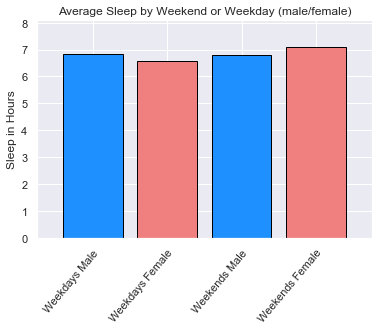

In [1209]:
# bar chart for average sleep by weekend/weekday for single male & female data
x_axis = avg_df["Weekday or Weekend"]
y_axis = avg_df["Average"]

plt.figure(figsize=(6,4))
plt.bar(x_axis, y_axis, color=["dodgerblue","lightcoral","dodgerblue","lightcoral"],edgecolor='black')
plt.xticks(rotation=50, ha="right", rotation_mode="anchor")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+1)
plt.ylabel("Sleep in Hours")
plt.title("Average Sleep by Weekend or Weekday (male/female)")
plt.show()


## Male and Female average sleep on Weekdays and Weekends

In [1210]:
# avg sleep_efficiency weekend
both_avg_weekends = sleep_efficiency_new_2[sleep_efficiency_new_2["WeekdayWeekend"]== "Date is Weekend"]
bwavg = both_avg_weekends["SleepDuration"].mean()
bw = bwavg * 60

In [1211]:
# avg american_sleep weekend
am_avg_weekends = am_sleep_sx[am_sleep_sx["Type of Days"]== "Weekend days and holidays"]
amwavg = am_avg_weekends["Avg hrs per day sleeping"].mean()
awe = amwavg*60

In [1218]:
mf_avg_weekend = (bw+awe) /2 /60
mf_avg_weekend
r_mf_avg_weekend = mf_avg_weekend.round(2)
r_mf_avg_weekend
# "%02d:%02d" % (divmod(mf_avg_weekend, 60)) + ", weekend average in hours and minutes"

8.41

In [1213]:
# avg sleep_efficiency weekday
both_avg_weekdays = sleep_efficiency_new_2[sleep_efficiency_new_2["WeekdayWeekend"]== "Date is Weekday"]
bwdavg = both_avg_weekdays["SleepDuration"].mean()
bd = bwdavg*60

In [1214]:
# avg american_sleep weekday
am_avg_weekdays = am_sleep_sx[am_sleep_sx["Type of Days"]== "Nonholiday weekdays"]
amwdavg = am_avg_weekdays["Avg hrs per day sleeping"].mean()
aw = amwdavg*60

In [1219]:
mf_avg_weekday = (bd+aw)/2/60
mf_avg_weekday
r_mf_avg_weekday = mf_avg_weekday.round(2)
r_mf_avg_weekday
# "%02d:%02d" % (divmod(mf_avg_weekday, 60)) + ", weekday average in hours and minutes"

7.93

In [1220]:
# dataframe for bar chart
b_avg_df = pd.DataFrame({"Weekday or Weekend":["Weekdays","Weekends"], 
                       "Average":[r_mf_avg_weekday,r_mf_avg_weekend]})
b_avg_df

,Weekday or Weekend,Average
0,Weekdays,7.93
1,Weekends,8.41


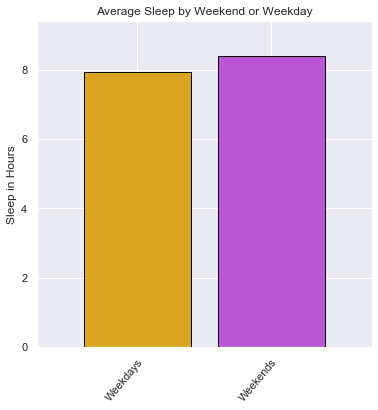

In [1225]:
# bar chart for average sleep by weekend/weekday for single male & female data
xaxis = b_avg_df["Weekday or Weekend"]
yaxis = b_avg_df["Average"]

plt.figure(figsize=(6,6))
plt.bar(xaxis, yaxis, color=["goldenrod","mediumorchid"],edgecolor='black')
plt.xticks(rotation=50, ha="right", rotation_mode="anchor")
plt.xlim(-0.75, len(xaxis)-0.25)
plt.ylim(0, max(yaxis)+1)
plt.ylabel("Sleep in Hours")
plt.title("Average Sleep by Weekend or Weekday")
plt.show()


## Summary Statistics by Age Group

In [1226]:
am_age_group_sl = am_sleep_sx.groupby(["Age Group"]).agg({"Avg hrs per day sleeping":["mean","median","var","std","sem"]})

am_age_group_sl

Avg hrs per day sleeping                             \
                                      mean median       var       std   
Age Group                                                               
15 to 24 years                    9.499556  9.345  0.271321  0.520885   
25 to 34 years                    8.792778  8.670  0.284933  0.533791   
35 to 44 years                    8.585333  8.410  0.257486  0.507431   
45 to 54 years                    8.483556  8.370  0.245070  0.495046   
55 to 64 years                    8.508778  8.420  0.121316  0.348305   
65 years and over                 8.965111  8.955  0.025690  0.160282   

                             
                        sem  
Age Group                    
15 to 24 years     0.054906  
25 to 34 years     0.056266  
35 to 44 years     0.053488  
45 to 54 years     0.052182  
55 to 64 years     0.036715  
65 years and over  0.016895

In [1227]:
se_age_group_sl = sleep_efficiency_new_2.groupby(["Age Group"]).agg({"SleepDuration":["mean","median","var","std","sem"]})
# "Awakenings":"mean"})
se_age_group_sl


SleepDuration                                     
                           mean median       var       std       sem
Age Group                                                           
15 to 24 years         7.584507    7.5  0.521328  0.722030  0.085689
25 to 34 years         7.524510    7.5  0.754344  0.868530  0.085997
35 to 44 years         7.447115    7.5  0.844263  0.918838  0.090099
45 to 54 years         7.350877    7.0  0.720928  0.849075  0.079523
55 to 64 years         7.464912    7.5  0.954104  0.976782  0.129378
65 years and over      7.625000    7.5  0.395833  0.629153  0.314576